<a href="https://colab.research.google.com/github/hbeck118/HOC-Project/blob/main/hocdraft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The setup and basis for this code is copied from map.ipynb by theaok

In [ ]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

import mapclassify

import seaborn as sns

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

from google.colab.data_table import DataTable
DataTable.max_columns = 250

In [ ]:
#!python --version
gpd.__version__

'1.0.1'

In [ ]:
#code for gdowm from chatgpt
!pip install -q gdown
import gdown

gdown.download(id='1q66zIbmgSQ__CzDA0PFPE6m_eCUNcUfK', output='parcels_cam.zip', quiet=False)
with zipfile.ZipFile('parcels_cam.zip', 'r') as zip_ref:
    zip_ref.extractall()

cam_par = gpd.read_file('CamdenCountyParcels.shp')

Downloading...
From (original): https://drive.google.com/uc?id=1q66zIbmgSQ__CzDA0PFPE6m_eCUNcUfK
From (redirected): https://drive.google.com/uc?id=1q66zIbmgSQ__CzDA0PFPE6m_eCUNcUfK&confirm=t&uuid=676120d4-4209-4441-b243-edbb05986710
To: /content/parcels_cam.zip
100%|██████████| 37.0M/37.0M [00:00<00:00, 187MB/s]


'parcels_cam.zip'

In [ ]:
#converting Block and Lot numbers for shapefile to floats for merging
cam_par['BLOCK'] = pd.to_numeric(cam_par['BLOCK'], errors='coerce')
cam_par['LOT'] = pd.to_numeric(cam_par['LOT'], errors='coerce')

In [ ]:
#uploading shapefile of Camden County municipalties and isolating Camden City, data from https://camdencountynj-ccdpw.opendata.arcgis.com/datasets/9bea5658edfa490c9d00f98fd9efb6d6_0/explore?location=39.902529%2C-75.078044%2C12.58
! wget -q -O camden_mun.zip https://docs.google.com/uc?id=1n1d2jnI1ty0NrE23rttSQ8t4gh_tYDPU&export=download

zip_ref = zipfile.ZipFile('camden_mun.zip', 'r'); zip_ref.extractall(); zip_ref.close()
cam_bound=gpd.read_file('Municipalities.shp')
cam_city = cam_bound.iloc[[7]]

In [ ]:
cam_city.head(2)

,FID,COUSUBNS,GEOID,NAMELSAD,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,GEOCODE,GlobalID,Shape__Are,Shape__Len,geometry
7,8,00885177,3400710000,Camden city,C5,F,23106182,3676392,+39.9367868,-75.1066438,28004.054276,3400710000,f5c8c982-1593-4592-a38a-485a23bd7d98,2.676122e+07,28004.054367,"POLYGON ((493032.266 4419551.728, 492897.768 4..."


In [ ]:
cam_bound

,FID,COUSUBNS,GEOID,NAMELSAD,CLASSFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,GEOCODE,GlobalID,Shape__Are,Shape__Len,geometry
0,1,00885144,3400702200,Audubon borough,C5,F,3838781,35535,+39.8901277,-75.0723825,9407.757950,3400702200,81d661c6-35a7-42ed-8afd-5f35d0b0e807,3.871214e+06,9407.757866,"POLYGON ((495599.23 4415536.249, 495508.749 44..."
1,2,00885145,3400702230,Audubon Park borough,C5,F,389606,46935,+39.8968373,-75.0888190,2734.677596,3400702230,f8ccbea8-76dd-44e7-992b-e367d22e31a1,4.361934e+05,2734.677499,"POLYGON ((492866.221 4416337.872, 492855.687 4..."
2,3,00885149,3400703250,Barrington borough,C5,F,4095340,0,+39.8689349,-75.0513618,11456.984021,3400703250,9e9086b1-16e4-429f-b5c4-d967de1dbd82,4.092067e+06,11456.984073,"POLYGON ((496819.374 4414558.505, 496827.878 4..."
3,4,00885154,3400704750,Bellmawr borough,C5,F,7729295,315734,+39.8663560,-75.0946695,18085.471872,3400704750,bdd07346-3ee8-471e-befd-b8b9e16eb0a9,8.038608e+06,18085.472003,"POLYGON ((492951.896 4413667.751, 492968.147 4..."
4,5,00885158,3400705440,Berlin borough,C5,F,9307767,35573,+39.7920594,-74.9369855,14823.777678,3400705440,032f4608-e579-4343-a5e1-7d3778ce56c5,9.335884e+06,14823.777540,"POLYGON ((507881.319 4403761.193, 507873.371 4..."
5,6,00882152,3400705470,Berlin township,T1,A,8656740,15360,+39.8071159,-74.9241780,15771.555136,3400705470,e17a4101-16d7-4093-b9da-43f1044ceef7,8.665170e+06,15771.555122,"POLYGON ((507848.567 4406644.366, 507978.687 4..."
6,7,00885172,3400708170,Brooklawn borough,C5,F,1265110,105763,+39.8793503,-75.1203958,5697.800517,3400708170,1e1a2ee3-3807-458d-8af0-7a2d5df7de30,1.369780e+06,5697.800436,"POLYGON ((490740.818 4414218.502, 490736.285 4..."
7,8,00885177,3400710000,Camden city,C5,F,23106182,3676392,+39.9367868,-75.1066438,28004.054276,3400710000,f5c8c982-1593-4592-a38a-485a23bd7d98,2.676122e+07,28004.054367,"POLYGON ((493032.266 4419551.728, 492897.768 4..."
8,9,00882155,3400712280,Cherry Hill township,T1,A,62346260,321495,+39.9046107,-74.9969997,42634.513569,3400712280,561f8439-f9d9-47af-a877-f4c81e30fd7a,6.261764e+07,42634.513259,"POLYGON ((506224.674 4413748.279, 506174.32 44..."
9,10,00885183,3400712550,Chesilhurst borough,C5,F,4442825,4000,+39.7297952,-74.8805311,9002.409548,3400712550,db06a511-84e0-41f6-a5d9-e8afa47e852f,4.443282e+06,9002.409554,"POLYGON ((512006.451 4397643.342, 512016.246 4..."


In [ ]:
#clipping the parcels dataset to only parcels within camden city
cam_par = cam_par.to_crs(cam_city.crs)
clip_city = gpd.clip(cam_par, cam_city)

In [ ]:
clip_city

,PAMS_PIN,MUN,BLOCK,LOT,QCODE,LASTUPDATE,geometry
199621,0416_3.01_15,0416,3.01,15.00,None,NaT,"MULTIPOLYGON (((491514.794 4416590.254, 491523..."
89307,0414_241_1.01,0414,241.00,1.01,None,NaT,"MULTIPOLYGON (((491353.924 4416538.218, 491353..."
120293,0416_3.07_6,0416,3.07,6.00,None,NaT,"MULTIPOLYGON (((491353.929 4416538.259, 491363..."
24868,0408_731_1,0408,731.00,1.00,None,NaT,"POLYGON ((491408.595 4417125.244, 491399.469 4..."
24875,0408_731_7,0408,731.00,7.00,None,NaT,"POLYGON ((491436.244 4417141.878, 491441.351 4..."
...,...,...,...,...,...,...,...
26079,0408_888_10.02,0408,888.00,10.02,None,NaT,"POLYGON ((492407.715 4423897.316, 492308.921 4..."
39403,0408_896_3,0408,896.00,3.00,None,NaT,"POLYGON ((492460.825 4423886.751, 492479.038 4..."
39405,0408_896_4,0408,896.00,4.00,None,NaT,"POLYGON ((492479.038 4423888.343, 492485.109 4..."
39406,0408_896_5,0408,896.00,5.00,None,NaT,"POLYGON ((492485.109 4423888.874, 492491.18 44..."


In [ ]:
clip_city.dtypes

,0
PAMS_PIN,object
MUN,object
BLOCK,float64
LOT,float64
QCODE,object
LASTUPDATE,datetime64[ms]
geometry,geometry


In [ ]:
#addint data collected by Heart of Camden about lots in Camden neighborhood Waterfront South
dataHOC=pd.read_excel('https://docs.google.com/uc?id=1PbteEiv3627ZB2dA9DvzoZ3UzPs5PX1l&export=download')

In [ ]:
dataHOC.head(5)

,Status,name,Block,Lot,Owner,Owneraddress,OwnerAddressSameasLocation,LienAmount,LienHolder,InfoverifiedbyCityOPRA,Size,AcquisitionType,AcquisitionStatus,Notes,LastSaleDate,PropertyClass,Other,FloodZone,HistoricDistrict,Zoning
0,Vacant Lot,1441 S 4th St,279.0,8.0,"PADIN-MONTALVO, MARIELYS","1439 SO 4TH STREET, CAMDEN, NJ 08104",no,-,NaN,no,NaN,NaN,NaN,NaN,NaN,15C-Public Property,NaN,NaN,NaN,NaN
1,Vacant Building,1443 S 4th St,279.0,81.0,BERGEN SQ COMMUNITY DEV COALITION,"PO BOX 445, CAMDEN, NJ 08101",no,21000,"CSA Homes LLC, Lillian Zhang",no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vacant Lot,1445 S 4th St,279.0,82.0,"SMITH, PEARL","1445 S 4th St CAMDEN, NJ 08104-1338",yes,52693.79,City of Camden,no,NaN,NaN,NaN,NaN,1997,NaN,856-963-7338? Maybe,NaN,NaN,NaN
3,Vacant Lot,434 Lansdowne,342.0,89.0,FIRST CHURCH OF DELIVERANCE,"PO BOX 1419, CAMDEN, NJ 08105",no,-,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vacant Building,1436 S 4th St,342.0,107.0,"KANELSKY, CHANA","1436 SO 4TH STREET, CAMDEN, NJ 08104",yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
clip_city.dtypes

,0
PAMS_PIN,object
MUN,object
BLOCK,float64
LOT,float64
QCODE,object
LASTUPDATE,datetime64[ms]
geometry,geometry


In [ ]:
dataHOC.dtypes

,0
Status,object
name,object
Block,float64
Lot,float64
Owner,object
Owneraddress,object
OwnerAddressSameasLocation,object
LienAmount,object
LienHolder,object
InfoverifiedbyCityOPRA,object


In [ ]:
cam_par.dtypes

,0
PAMS_PIN,object
MUN,object
BLOCK,float64
LOT,float64
QCODE,object
LASTUPDATE,datetime64[ms]
geometry,geometry


In [ ]:
cam_par2 = clip_city.rename(columns={'BLOCK': 'Block', 'LOT': 'Lot'})

In [ ]:
cam_par2.dtypes

,0
PAMS_PIN,object
MUN,object
Block,float64
Lot,float64
QCODE,object
LASTUPDATE,datetime64[ms]
geometry,geometry


In [ ]:
HOCmap = pd.merge(dataHOC, cam_par2, on=['Block', 'Lot'],how='outer',indicator='merge')
HOCmap[['Block','Lot','merge', 'Status', 'LienAmount']]

HOCmap1 = pd.merge(dataHOC, cam_par2, on=['Block', 'Lot'],how='inner',indicator=False)

,Block,Lot,merge,Status,LienAmount
0,1.00,1.0,right_only,NaN,NaN
1,1.01,10.0,right_only,NaN,NaN
2,2.00,2.0,right_only,NaN,NaN
3,2.00,12.0,right_only,NaN,NaN
4,2.00,16.0,right_only,NaN,NaN
...,...,...,...,...,...
32691,6709.00,6.0,right_only,NaN,NaN
32692,6709.00,7.0,right_only,NaN,NaN
32693,6710.00,1.0,right_only,NaN,NaN
32694,6710.00,6.0,right_only,NaN,NaN


In [ ]:
HOCmap1

,Status,name,Block,Lot,Owner,Owneraddress,OwnerAddressSameasLocation,LienAmount,LienHolder,InfoverifiedbyCityOPRA,...,PropertyClass,Other,FloodZone,HistoricDistrict,Zoning,PAMS_PIN,MUN,QCODE,LASTUPDATE,geometry
0,Vacant Building,1443 S 4th St,279.0,81.0,BERGEN SQ COMMUNITY DEV COALITION,"PO BOX 445, CAMDEN, NJ 08101",no,21000,"CSA Homes LLC, Lillian Zhang",no,...,NaN,NaN,NaN,NaN,NaN,0408_279_81,0408,None,NaT,"POLYGON ((489596 4419777.579, 489574.996 44197..."
1,Vacant Lot,1445 S 4th St,279.0,82.0,"SMITH, PEARL","1445 S 4th St CAMDEN, NJ 08104-1338",yes,52693.79,City of Camden,no,...,NaN,856-963-7338? Maybe,NaN,NaN,NaN,0408_279_82,0408,None,NaT,"POLYGON ((489596.403 4419773.347, 489575.775 4..."
2,Vacant Lot,434 Lansdowne,342.0,89.0,FIRST CHURCH OF DELIVERANCE,"PO BOX 1419, CAMDEN, NJ 08105",no,-,NaN,no,...,NaN,NaN,NaN,NaN,NaN,0408_342_89,0408,None,NaT,"POLYGON ((489674.231 4419799.777, 489699.408 4..."
3,Vacant Building,1436 S 4th St,342.0,107.0,"KANELSKY, CHANA","1436 SO 4TH STREET, CAMDEN, NJ 08104",yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0408_342_107,0408,None,NaT,"POLYGON ((489635.58 4419797.025, 489635.69 441..."
4,Vacant Building,1438 S 4th St,342.0,108.0,"BOSTON, MABLE & BOSTON, ERNEST JR","1438 SO 4TH STREET,CAMDEN, NJ 08104",yes,24000,City of Camden,no,...,NaN,NaN,NaN,NaN,NaN,0408_342_108,0408,None,NaT,"POLYGON ((489614.024 4419783.643, 489613.637 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Vacant Lot,521 CHELTON AVE\t,501.0,47.0,"CHELTON SERVICE COMPANY, LLC","570 CHELTON AVENUE, CAMDEN, NJ 08104\t","no, but nearby",NaN,-,NaN,...,NaN,"06/21/2001$4,000$1,800\n06/21/2001$4,000$1,800...",NaN,NaN,NaN,0408_501_47,0408,None,NaT,"POLYGON ((489820.805 4418732.612, 489820.658 4..."
997,Vacant Lot,527 CHELTON AVE,501.0,48.0,"CHELTON SERVICE COMPANY, LLC","570 CHELTON AVENUE, CAMDEN, NJ 08104\t","no, but nearby",NaN,-,NaN,...,NaN,"09/23/1993$5,200$15,300\n04/01/1993$100$15,300",NaN,NaN,NaN,0408_501_48,0408,None,NaT,"POLYGON ((489832.983 4418702.365, 489828.11 44..."
998,Vacant Lot,529 CHELTON AVE,501.0,49.0,"CHELTON SERVICE COMPANY, LLC","570 CHELTON AVENUE, CAMDEN, NJ 08104\t","no, but nearby",NaN,-,NaN,...,NaN,NaN,NaN,NaN,NaN,0408_501_49,0408,None,NaT,"POLYGON ((489833.642 4418732.317, 489839.734 4..."
999,Vacant Building,2001 SO 6TH ST,502.0,39.0,"2001 SOUTH SIX, LLC","1930 6TH STREET, CAMDEN, NJ 08104",no,NaN,NaN,NaN,...,4B-Industrial,NaN,NaN,NaN,NaN,0408_502_39,0408,None,NaT,"POLYGON ((489851.26 4418701.945, 489853.94 441..."


In [ ]:
type(HOCmap1)

pandas.core.frame.DataFrame

In [ ]:
HOCmap2 = gpd.GeoDataFrame(HOCmap1)

In [ ]:
HOCmap2.dtypes

,0
Status,object
name,object
Block,float64
Lot,float64
Owner,object
Owneraddress,object
OwnerAddressSameasLocation,object
LienAmount,object
LienHolder,object
InfoverifiedbyCityOPRA,object


In [ ]:
HOCmap2['LienAmount'] = pd.to_numeric(HOCmap2['LienAmount'], errors='coerce')

<Axes: >

<Axes: >

[]

[]

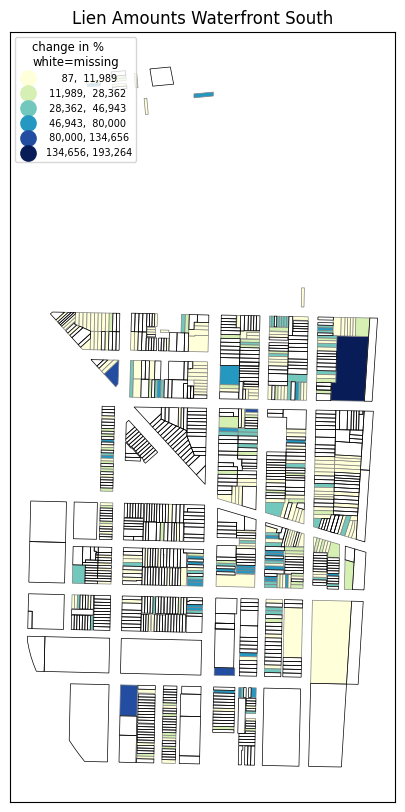

In [ ]:

fig, ax = plt.subplots(1, figsize=(6,10))
HOCmap2.plot(ax=ax,column='LienAmount',legend=True,cmap='YlGnBu',
          scheme="natural_breaks", k=6, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'upper left', 'markerscale':1.2,'title_fontsize':'small','fontsize':'7'})
leg1 = ax.get_legend()
leg1.set_title('''change in % \nwhite=missing''')

missing = HOCmap2[HOCmap2['LienAmount'].isna()]
missing.boundary.plot(ax=ax, color='black', linewidth=0.5)

ax.title.set_text("Lien Amounts Waterfront South")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks